# Airflow 공부
#### 2022.08.05
***
## DAG branch(분기)
***

task 연결은 아래와 같은 기호를 사용하여 연결
- <<, >> []
- set_downstream or set_upstream(해당 부분은 아직 잘 모름ㅠ)

branc는 특정 조건을 설정하여 이를 만족하면 지정된 경로로 DAG가 흐르게(?) 해줌 -> 일종의 분기점인 셈

지정된 branch로 가게 하는 것은 airflow operator의 branch operator를 활용해서 할 수 있다.

In [7]:
from datetime import datetime, timedelta
from textwrap import dedent

from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.dummy import DummyOperator
from airflow.operators.python import BranchPythonOperator
from airflow.operators.python_operator import PythonOperator
from airflow.utils.trigger_rule import TriggerRule

from random import randint

In [4]:
def which_path() :
    return 'Path_1' if randint(1, 2) == 1 else 'Path_2'

위의 코드는 랜덤하게 정수(1 혹은 2)를 받아 분기 지점을 반환한다.

In [ ]:
dag_args = {'dag_id' : 'BRANCH_DAG', 'start_date' : datetime(2022, 8, 8)}

In [ ]:
with DAG( **dag_args) as dag :
    
    t1 = BashOperator(task_id = 'print_date', bash_command = 'date')
    
    t2 = BranchPythonOperator(task_id = 'branch', python_callable = which_path)
    
    t3 = BashOperator(task_id = 'my_name_ki', depends_on_past = False, bash_command = 'echo "안녕하세요."')
    
    t4 = BashOperator(task_id = 'ignore', depends_on_past = False, bash_command = 'echo "Bye"')
    
    complete = BashOperator(task_id = 'complete', depends_on_past = False,
                           bash_command = 'echo "Complete!"', trigger_rule = TriggerRule.NONE_FAILED)
    
    dummy = DummyOperator(task_id = 'Path_1')
    
    t1 >> t2 >>dummy >> t3 >> complete
    t1 >> t2 >> t4 >> complete

t2의 python_callable은 위의 which_path 함수를 적용해준다. 이 때, 정수 1 혹은 2 중 반환 되는 결과에 따라 Path_1, Path_2로 가도록 설정된다.

각 Path는 task_id에 맞게 간다고 보면 됨.

Operator로 만든 task들 간의 관계를 설정할 때는 순서를 어떻게 할 지 설정한다.
t2 task에서 분기가 일어나 상태에 따라 t4 혹은 dummy로 가게 된다.
***
참고 출처 : https://lsjsj92.tistory.com/632

In [13]:
from IPython.display import Image

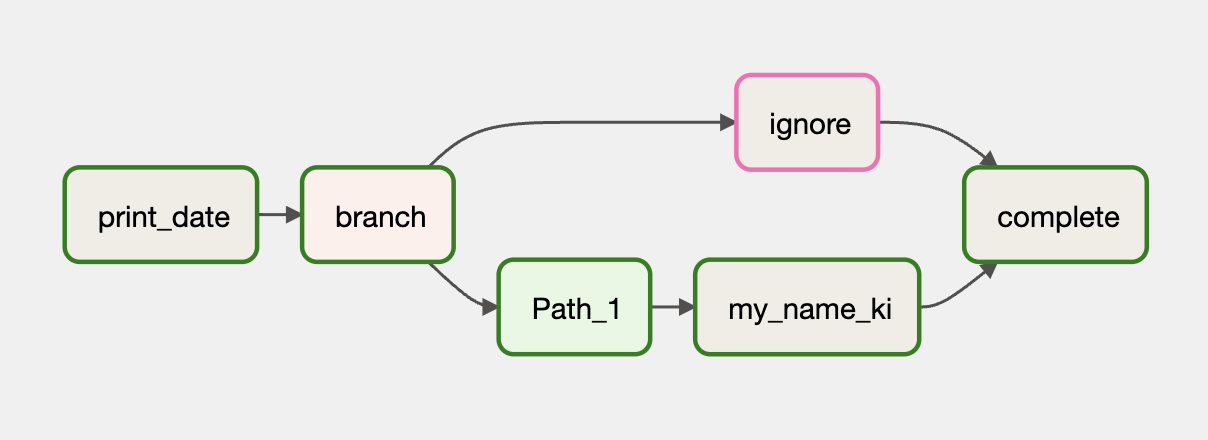

In [14]:
Image('./BRANCH_DAG.png')

DAG 실행시 Graph는 위와 같다. 분기에서 Path_1로 가도록 설정 되었고 ignore task는 skip(분홍색) 된 것을 알 수 있다.